In [1]:
######## plot the windowed correlation length scales ############

import matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
rcParams.update({'font.size': 22})

from matplotlib import rc
rc('text', usetex=True)
import numpy as np
import h5py as HD5
import glob
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d as gf
from scipy.integrate import simps

def corr_move(case_id,N_x, pid = 1, sigma=None):
    
    TSR = ['3','5','8','5']
    sx = ['7','7','7','3p5']
    if pid == 1:
        pathname='Small_window_Corr_TSR_%s_sx_%sD'%(TSR[case_id],sx[case_id])
        N_T = 62
        N_L = N_x//2+1
    elif pid == 2:
        pathname = 'Corr_plots_TSR_%s_sx_%sD'%(TSR[case_id],sx[case_id])
        N_T = 12
        N_L = N_x//2+1

    elif pid == 3:
        pathname = 'New_window_TSR_%s_sx_%sD'%(TSR[case_id],sx[case_id])
        N_T = 16
        N_L = 153

    else:
        raise ValueError("invalid pid")
        
    fu = sorted(glob.glob(pathname+'/Corr_uu_2D_*.mat'))
    fv = sorted(glob.glob(pathname+'/Corr_vv_2D_*.mat'))
    fw = sorted(glob.glob(pathname+'/Corr_ww_2D_*.mat'))
    fL = pathname+'/Corr_L_1.mat'
    fT = pathname+'/Corr_T_1.mat'
    N = len(fu)

    
    Emu=np.zeros((5,N_T,N_L))
    Emv=np.zeros((5,N_T,N_L))
    Emw=np.zeros((5,N_T,N_L))

    for f in fu:
        File_U = HD5.File(f,'r')
        data_s = File_U.get('Ea')
        Eu = np.array(data_s,order="F")
        Emu += Eu
    
    Emu = Emu/float(N)
    

    for f in fv:
        File_V = HD5.File(f,'r')
        data_s = File_V.get('Eb')
        Ev = np.array(data_s,order="F")
        Emv += Ev
    
    Emv = Emv/float(N)
    
    
    for f in fw:
        File_W = HD5.File(f,'r')
        data_s = File_W.get('Ec')
        Ew = np.array(data_s,order="F")
        Emw += Ew
    
    Emw = Emw/float(N)
       
    File_L = HD5.File(fL,'r')
    File_T = HD5.File(fT,'r')
    data_L = File_L.get('Lx')
    data_T = File_T.get('Tx')

        
    L = np.array(data_L,order="F")
    T = np.array(data_T,order="F")
    
    I_u = np.zeros((5,N_T,N_L))
    I_w = np.zeros_like(I_u)
    
    Int_u, Int_w = np.zeros((5, N_T)), np.zeros((5,N_T))
    
    T_samp = np.zeros((N_T,))
    L_samp = np.zeros((N_L,))
    
    for i in range(N_T):
        T_samp[i] = T[0,i]
        
    for i in range(N_L):
        L_samp[i] = L[0,i]
        
        
    
    for p in range(5):
        for i in range(N_T):
            I_u[p,i,:] = Emu[p,i,:]/np.nanmax(Emu[p,i,:])
            I_w[p,i,:] = Emw[p,i,:]/np.nanmax(Emw[p,i,:])
            
            
    # Filter, integrate to create the integral length scales
    for p in range(5):
        for i in range(N_T):
            _tempu = I_u[p,i,:]
            _tempw = I_w[p,i,:]
            
            _temp2u = _tempu[~np.isnan(_tempu)]
            _temp2w = _tempw[~np.isnan(_tempw)]

            Nminu = np.argmin(_temp2u)
            Nmaxu = np.argmax(_temp2u)
            
            Nminw = np.argmin(_temp2w)
            Nmaxw = np.argmax(_temp2w)
            
            Lu_ = L_samp[~np.isnan(_tempu)]
            Lw_ = L_samp[~np.isnan(_tempw)]

            Int_u[p,i] = simps(_temp2u[Nminu:(2*Nmaxu-Nminu)] , Lu_[Nminu:(2*Nmaxu-Nminu)]*dx/d)
            Int_w[p,i] = simps(_temp2w[Nminw:(2*Nmaxw-Nminw)] , Lw_[Nminw:(2*Nmaxw-Nminw)]*dx/d)
            
            
        
    if sigma is not None:
        for p in range(5):
            Int_u[p,:] = gf(Int_u[p,:],sigma)
            Int_w[p,:] = gf(Int_w[p,:],sigma)

        

    
    return T_samp, Int_u, Int_w

### Window Sizes:
* Small window <br>
maxlag = floor(0.25*Nx) <br>
window = floor(0.45*Nx) <br>
overlap = floor(0.4*Nx) <br>

* Big Window <br>
maxlag = floor(0.25*Nx) <br>
window = floor(0.45*Nx) <br>
overlap = floor(0.4*Nx) <br>


* New Window <br>
maxlag = floor(0.15*Nx) <br>
window = floor(0.2*Nx) <br>
overlap = floor(0.15*Nx) <br>


In [2]:
N_x = 512
dx = 6.0*np.pi/N_x
d = 0.4

T1, In_u1, In_w1 = corr_move(0,N_x,sigma=1.75)
T2, In_u2, In_w2 = corr_move(1,N_x,sigma=1.75)
T3, In_u3, In_w3 = corr_move(2,N_x,sigma=1.75)
T4, In_u4, In_w4 = corr_move(3,N_x,sigma=1.75)


TB1, InB_u1, InB_w1 = corr_move(0,N_x,pid=2,sigma=1.0)
TB2, InB_u2, InB_w2 = corr_move(1,N_x,pid=2,sigma=1.0)
TB3, InB_u3, InB_w3 = corr_move(2,N_x,pid=2,sigma=1.0)
TB4, InB_u4, InB_w4 = corr_move(3,N_x,pid=2,sigma=1.0)

TC1, InC_u1, InC_w1 = corr_move(0,N_x,pid=3,sigma=1.0)
TC2, InC_u2, InC_w2 = corr_move(1,N_x,pid=3,sigma=1.0)
TC3, InC_u3, InC_w3 = corr_move(2,N_x,pid=3,sigma=1.0)
TC4, InC_u4, InC_w4 = corr_move(3,N_x,pid=3,sigma=1.0)

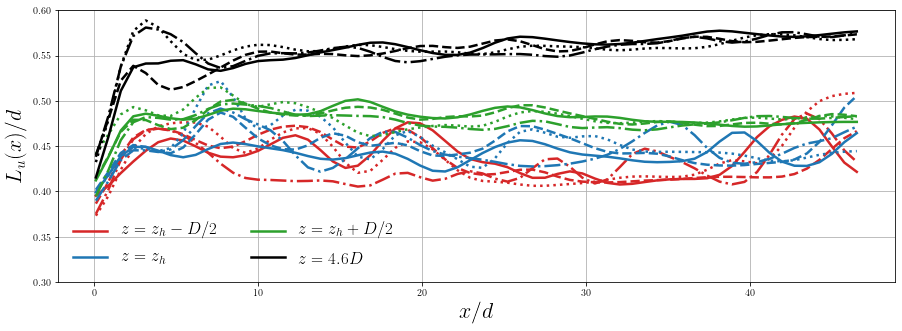

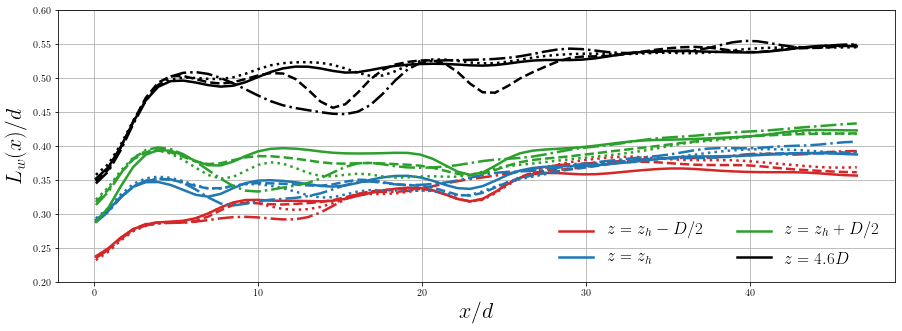

In [3]:
## Small window plots

fig0 = plt.figure(figsize=(15,5))
ax0= fig0.add_subplot(111)

fig1 = plt.figure(figsize=(15,5))
ax1= fig1.add_subplot(111)

colors=['Tab:Red','Tab:Red','Tab:Blue','Tab:Green','Black']
labels=['$z = 0.125D$','$z = z_h-D/2$','$z = z_h$','$z = z_h+D/2$','$z = 4.6D$']

for p in range(1,5):
    ax0.plot(T1*dx/d,In_u1[p,:],color=colors[p],linewidth=2.5,linestyle='solid',label=labels[p])
    ax0.plot(T2*dx/d,In_u2[p,:],color=colors[p],linewidth=2.5,linestyle='dashed')
    ax0.plot(T3*dx/d,In_u3[p,:],color=colors[p],linewidth=2.5,linestyle=':')
    ax0.plot(T4*dx/d,In_u4[p,:],color=colors[p],linewidth=2.5,linestyle='-.')
    
    ax1.plot(T1*dx/d,In_w1[p,:],color=colors[p],linewidth=2.5,linestyle='solid',label=labels[p])
    ax1.plot(T2*dx/d,In_w2[p,:],color=colors[p],linewidth=2.5,linestyle='dashed')
    ax1.plot(T3*dx/d,In_w3[p,:],color=colors[p],linewidth=2.5,linestyle=':')
    ax1.plot(T4*dx/d,In_w4[p,:],color=colors[p],linewidth=2.5,linestyle='-.')
    
ax0.set_ylim([0.3,0.6])
ax1.set_ylim([0.2,0.6])

ax0.set_xlabel(r'$x/d$', fontsize=22)
ax1.set_xlabel(r'$x/d$', fontsize=22)

ax0.set_ylabel(r'$L_{u}(x)/d$', fontsize=22)   # relative to plt.rcParams['fon 
ax1.set_ylabel(r'$L_{w}(x)/d$', fontsize=22)   # relative to plt.rcParams['fon                                    

ax0.legend(ncol=2,loc = 'best',fontsize=17,frameon=False)
ax0.grid(True)

ax1.legend(ncol=2,loc = 'best',fontsize=17,frameon=False)
ax1.grid(True)

    


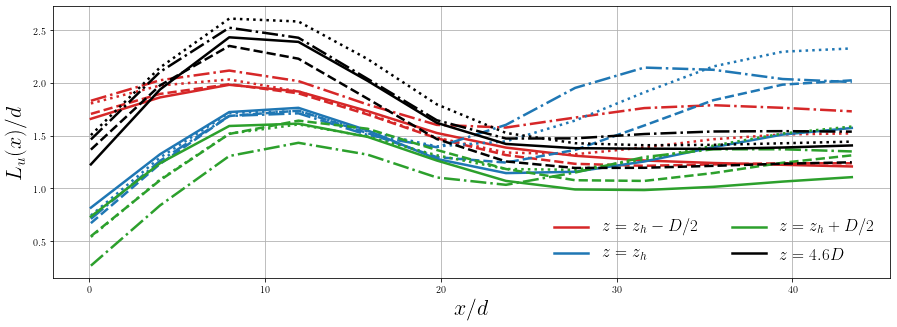

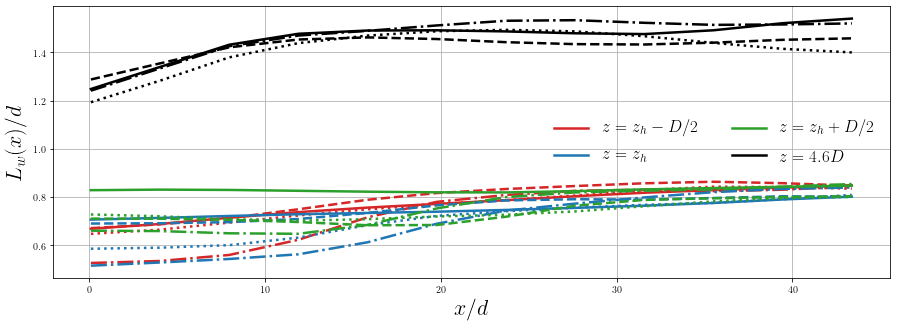

In [4]:
## Small window plots

fig0 = plt.figure(figsize=(15,5))
ax0= fig0.add_subplot(111)

fig1 = plt.figure(figsize=(15,5))
ax1= fig1.add_subplot(111)

colors=['Tab:Red','Tab:Red','Tab:Blue','Tab:Green','Black']
labels=['$z = 0.125D$','$z = z_h-D/2$','$z = z_h$','$z = z_h+D/2$','$z = 4.6D$']

for p in range(1,5):
    ax0.plot(TB1*dx/d,InB_u1[p,:],color=colors[p],linewidth=2.5,linestyle='solid',label=labels[p])
    ax0.plot(TB2*dx/d,InB_u2[p,:],color=colors[p],linewidth=2.5,linestyle='dashed')
    ax0.plot(TB3*dx/d,InB_u3[p,:],color=colors[p],linewidth=2.5,linestyle=':')
    ax0.plot(TB4*dx/d,InB_u4[p,:],color=colors[p],linewidth=2.5,linestyle='-.')
    
    ax1.plot(TB1*dx/d,InB_w1[p,:],color=colors[p],linewidth=2.5,linestyle='solid',label=labels[p])
    ax1.plot(TB2*dx/d,InB_w2[p,:],color=colors[p],linewidth=2.5,linestyle='dashed')
    ax1.plot(TB3*dx/d,InB_w3[p,:],color=colors[p],linewidth=2.5,linestyle=':')
    ax1.plot(TB4*dx/d,InB_w4[p,:],color=colors[p],linewidth=2.5,linestyle='-.')
    
#ax0.set_ylim([0.3,0.6])
#ax1.set_ylim([0.2,0.6])

ax0.set_xlabel(r'$x/d$', fontsize=22)
ax1.set_xlabel(r'$x/d$', fontsize=22)

ax0.set_ylabel(r'$L_{u}(x)/d$', fontsize=22)   # relative to plt.rcParams['fon 
ax1.set_ylabel(r'$L_{w}(x)/d$', fontsize=22)   # relative to plt.rcParams['fon                                    

ax0.legend(ncol=2,loc = 'best',fontsize=17,frameon=False)
ax0.grid(True)

ax1.legend(ncol=2,loc = 'best',fontsize=17,frameon=False)
ax1.grid(True)

    


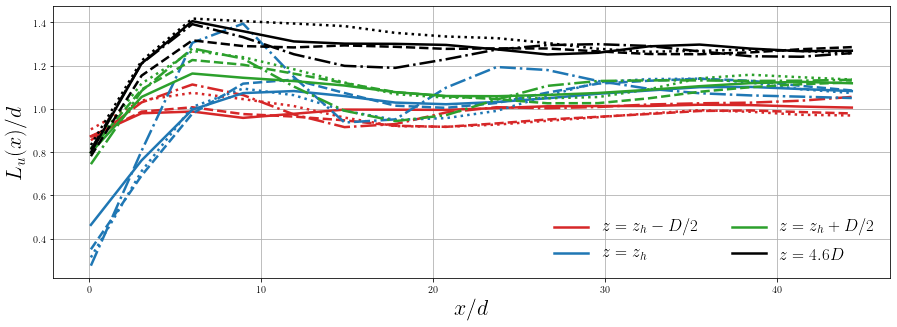

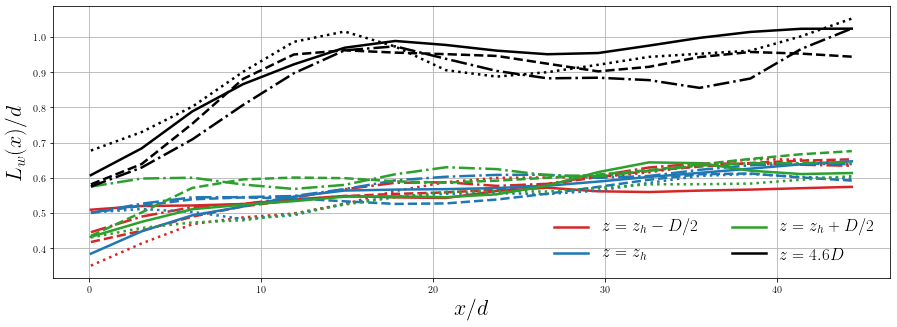

In [5]:
## Small window plots

fig0 = plt.figure(figsize=(15,5))
ax0= fig0.add_subplot(111)

fig1 = plt.figure(figsize=(15,5))
ax1= fig1.add_subplot(111)

colors=['Tab:Red','Tab:Red','Tab:Blue','Tab:Green','Black']
labels=['$z = 0.125D$','$z = z_h-D/2$','$z = z_h$','$z = z_h+D/2$','$z = 4.6D$']

for p in range(1,5):
    ax0.plot(TC1*dx/d,InC_u1[p,:],color=colors[p],linewidth=2.5,linestyle='solid',label=labels[p])
    ax0.plot(TC2*dx/d,InC_u2[p,:],color=colors[p],linewidth=2.5,linestyle='dashed')
    ax0.plot(TC3*dx/d,InC_u3[p,:],color=colors[p],linewidth=2.5,linestyle=':')
    ax0.plot(TC4*dx/d,InC_u4[p,:],color=colors[p],linewidth=2.5,linestyle='-.')
    
    ax1.plot(TC1*dx/d,InC_w1[p,:],color=colors[p],linewidth=2.5,linestyle='solid',label=labels[p])
    ax1.plot(TC2*dx/d,InC_w2[p,:],color=colors[p],linewidth=2.5,linestyle='dashed')
    ax1.plot(TC3*dx/d,InC_w3[p,:],color=colors[p],linewidth=2.5,linestyle=':')
    ax1.plot(TC4*dx/d,InC_w4[p,:],color=colors[p],linewidth=2.5,linestyle='-.')
    
#ax0.set_ylim([0.3,0.6])
#ax1.set_ylim([0.2,0.6])

ax0.set_xlabel(r'$x/d$', fontsize=22)
ax1.set_xlabel(r'$x/d$', fontsize=22)

ax0.set_ylabel(r'$L_{u}(x)/d$', fontsize=22)   # relative to plt.rcParams['fon 
ax1.set_ylabel(r'$L_{w}(x)/d$', fontsize=22)   # relative to plt.rcParams['fon                                    

ax0.legend(ncol=2,loc = 'best',fontsize=17,frameon=False)
ax0.grid(True)

ax1.legend(ncol=2,loc = 'best',fontsize=17,frameon=False)
ax1.grid(True)

    
